<a href="https://colab.research.google.com/github/AleR26/ColabFiles/blob/main/PracticaRegresionLinealSimple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial y Analítica de Datos

## Programación para Analítica Descriptiva y Predictiva - Marzo 2025
## Práctica: Regresión Lineal Simple con Scikit-Learn
---


## Datos del Estudiante

*   Apellidos y Nombre:Alejandra Margarita Rivas Simental
*   Matrícula:263162

---

## Objetivo de aprendizaje
Al finalizar esta práctica, el estudiante será capaz de **aplicar la regresión lineal simple utilizando Scikit-Learn para modelar la relación entre dos variables numéricas**, verificar los principales supuestos del modelo (linealidad, normalidad de residuos y homocedasticidad), **interpretar los coeficientes del modelo**, calcular e interpretar la **correlación entre variables** y evaluar el desempeño del modelo mediante métricas como el MSE, RMSE y R².


Trabajarás con el archivo restaurantes.csv, que contiene dos columnas:

- `poblation`: población de la ciudad (variable independiente). Tiene valores decimales mayores que cero. Estos valores representan la población de la ciudad multiplicada por 10,000. Por ejemplo, 6.1101 significa que la población de esa ciudad es 61,101.

- `profit`: ganancia del restaurante en esa ciudad (variable dependiente). Tiene valores decimales, algunos negativos y otros positivos. Estos representan las ganancias mensuales promedio de su restaurante en cada ciudad, en unidades de $10,000. Por ejemplo, 17.592 representa 175,920 en ganancias mensuales promedio para esa ciudad. -2.6807 representa -26,807 en pérdidas mensuales promedio para esa ciudad.





## 🔧 Parte 1: Carga de datos y bibliotecas
1. Importa las bibliotecas necesarias.
2. Carga el archivo `restaurantes.csv`
3. Muestra las primeras filas del dataframe.
4. Describe estadísticamente el conjunto de datos.

In [1]:
# Escribe tu código aquí
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/sample_data/restaurantes.csv')
print(df.head(5))
print("Descripción estadistica de los datos\n", df.describe())


   poblation   profit
0     6.1101  17.5920
1     5.5277   9.1302
2     8.5186  13.6620
3     7.0032  11.8540
4     5.8598   6.8233
Descripción estadistica de los datos
        poblation     profit
count  97.000000  97.000000
mean    8.159800   5.839135
std     3.869884   5.510262
min     5.026900  -2.680700
25%     5.707700   1.986900
50%     6.589400   4.562300
75%     8.578100   7.046700
max    22.203000  24.147000


##  Parte 2: Análisis exploratorio y relación entre variables

### 2.1 Diagrama de Dispersión
1. Grafica un **diagrama de dispersión** entre `poblation` y `profit`
2. Responde:  
**¿La relación entre las variables parece lineal? ¿Por qué?**
Podemos ver que existe una relación lineal positiva entre el profit y la poblacion, esta un poco disperso sobre todo cuando la población es pequeña, pero conforme va aumentando va mejorando la tendencia

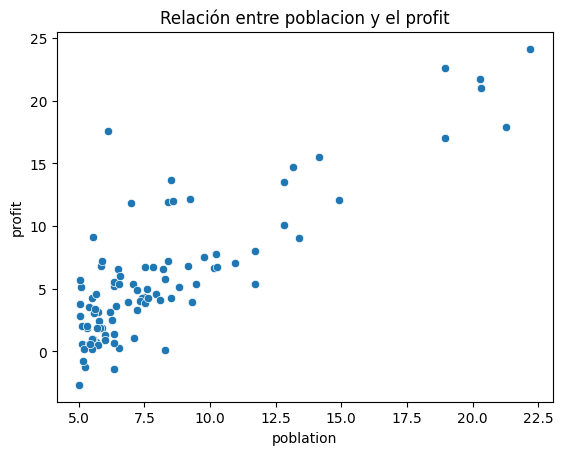

In [2]:
# Diagrama de dispersión
# Crear un scatterplot entre 'poblation' y 'profit'
sns.scatterplot(x='poblation', y='profit', data=df)
plt.title(f"Relación entre poblacion y el profit")
# Mostrar el gráfico
plt.show()

### 2.2: Cálculo e interpretación de la correlación
1. Calcula e imprime el **coeficiente de correlación de Pearson** entre `poblation` y `profit`
2. Interpreta el resultado:
- ¿Qué tan fuerte es la relación? **La correlacion es de 0.83 por lo que podemos decir que es una correlación fuerte**
- ¿Es positiva o negativa? **Tenemos una correlación positiva**
- ¿Es coherente con el gráfico anterior? **Si**

In [3]:
# Cálculo de correlación
correlacion_df = df.corr(method = 'pearson')
print(f"Correlacion de Pearson\n{correlacion_df}")

Correlacion de Pearson
           poblation    profit
poblation   1.000000  0.837873
profit      0.837873  1.000000


## Parte 3: Construcción del modelo, coeficientes y visualización

###3.1 Construcción del modelo - obtención de los parámetros y coeficientes
1. Construye un modelo de regresión lineal simple usando las bibliotecas de Scikit-Learn
2. Imprime el intercepto y el coeficiente de la regresión (pendiente)
3. Interpreta el Intercepto: ¿Qué significa en términos del contexto del problema? **Significa cuanto seria la ganancia del restaurante si el numero de la población fuera cero**
4. Interpreta el coeficiente de la regresión (pendiente) ¿Qué significa en términos del contexto del problema? **Que por cada 10000 personas se espera que la ganancia aumente en $11930**

In [4]:
# Construcción del modelo  y Coeficientes del modelo
modelo_regresion = LinearRegression()

# Reshape the 'poblation' column to a 2D array
x = df['poblation'].values.reshape(-1, 1)
y = df['profit']

#Entrenar el modelo
modelo_regresion.fit(x, y)
print("Modelo entrenado exitosamente!")

pendiente = modelo_regresion.coef_[0]
intercepto = modelo_regresion.intercept_

print(f"\nCoeficiente (Pendiente, β₁): {pendiente:.4f}")
print(f"Intercepto (Ordenada al origen, β₀): {intercepto:.4f}")

print(f"\nEcuación de Regresión: Y = {intercepto:.4f} + {pendiente:.4f} * X")



Modelo entrenado exitosamente!

Coeficiente (Pendiente, β₁): 1.1930
Intercepto (Ordenada al origen, β₀): -3.8958

Ecuación de Regresión: Y = -3.8958 + 1.1930 * X


### 3.2 Visualización del modelo
1. Grafica los puntos originales (poblation vs profit) y dibuja la línea de regresión ajustada.
2. Asegúrate de incluir leyenda y títulos.

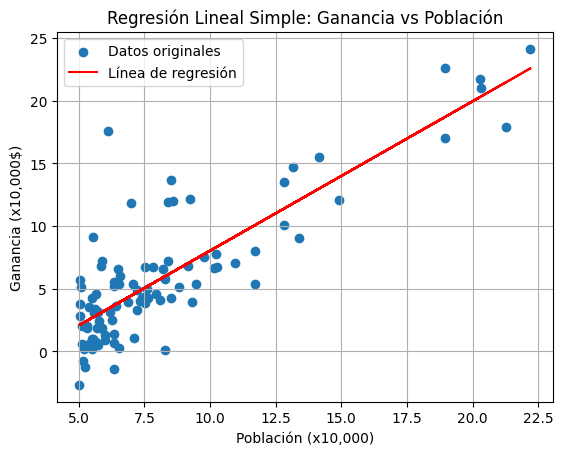

In [5]:
# Visualización del modelo ajustado

# Graficar los puntos originales
plt.scatter(x, y, label='Datos originales')

# Dibujar la línea de regresión ajustada
plt.plot(x, modelo_regresion.predict(x), color='red', label='Línea de regresión')

# Añadir etiquetas y título
plt.xlabel('Población (x10,000)')
plt.ylabel('Ganancia (x10,000$)')
plt.title('Regresión Lineal Simple: Ganancia vs Población')
plt.legend()
plt.grid(True)
plt.show()

## Parte 4: Supuestos del modelo de regresión lineal

### 4.1. Normalidad de los residuos
1. Calcula los residuos (reales - predichos).
2. Grafica un **histograma con KDE** de los residuos.
3. Responde: ¿Los residuos siguen una distribución normal? **Si siguen una distribucion normal sesgada a la izquiera, habiendo una mayor concentracion de datos entre -3 a 3**

In [6]:
# Normalidad de los residuos
predichos = modelo_regresion.predict(x)
df['predichos'] = predichos
df['residuos'] = y - predichos
df

,poblation,profit,predichos,residuos
0,6.1101,17.59200,3.393774,14.198226
1,5.5277,9.13020,2.698951,6.431249
2,8.5186,13.66200,6.267196,7.394804
3,7.0032,11.85400,4.459272,7.394728
4,5.8598,6.82330,3.095158,3.728142
...,...,...,...,...
92,5.8707,7.20290,3.108162,4.094738
93,5.3054,1.98690,2.433740,-0.446840
94,8.2934,0.14454,5.998524,-5.853984
95,13.3940,9.05510,12.083712,-3.028612


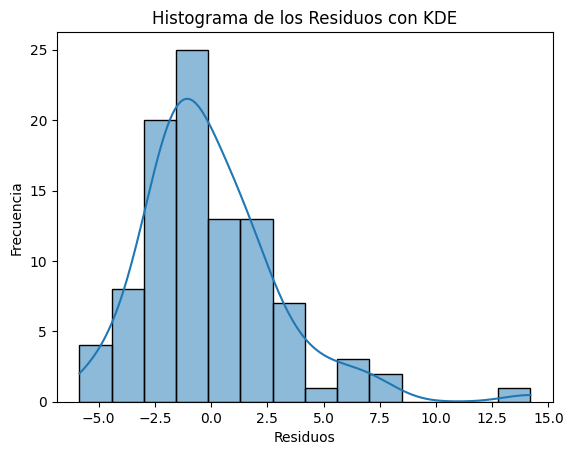

In [7]:
# Grafica un histograma con KDE de los residuos
sns.histplot(df['residuos'], kde=True)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de los Residuos con KDE')
plt.show()

### 4.2. Homocedasticidad
1. Grafica los residuos vs valores predichos.
2. ¿Los residuos están distribuidos aleatoriamente o muestran un patrón? **No muestran un patron por lo que no cumple con la homocedasticidad, por lo ranto podrian estar sesgados**

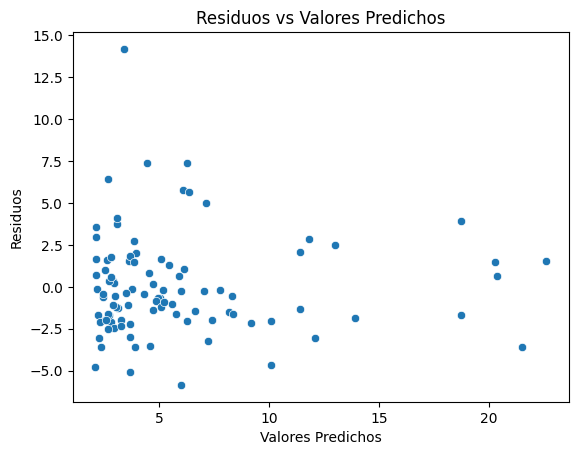

In [8]:
# Gráfico de residuos vs predichos
sns.scatterplot(x=df['predichos'], y=df['residuos'])
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores Predichos')
plt.show()

### 4.3. Q-Q Plot para evaluar la normalidad
1. Grafica el Q-Q Plot:.
2. Interpreta el gráfico: a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal y b) Desviaciones sistemáticas indican asimetría o colas pesadas. **Tenemos colas pesadas sobretodo la cola superior**

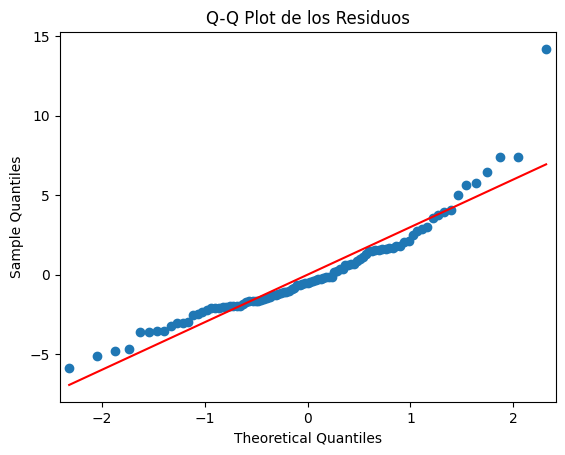

In [9]:
# Q-Q Plot
import statsmodels.api as sm

sm.qqplot(df['residuos'], line='s')
plt.title('Q-Q Plot de los Residuos')
plt.show()

## Parte 5: Evaluación del modelo

---


1. Calcula las métricas:
- MSE
- RMSE
- R²
2. Interpreta: ¿Qué nos dicen sobre el ajuste del modelo?

In [10]:
# Evaluación del modelo
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calcular las predicciones
predichos = modelo_regresion.predict(x)

# Calcular MSE
mse = mean_squared_error(y, predichos)

# Calcular RMSE
rmse = np.sqrt(mse)

# Calcular R²
r_cuadrado = r2_score(y, predichos)


print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
print(f"Coeficiente de Determinación (R²): {r_cuadrado:.4f}")

Error Cuadrático Medio (MSE): 8.9539
Raíz del Error Cuadrático Medio (RMSE): 2.9923
Coeficiente de Determinación (R²): 0.7020


## Parte 6: Conclusiones
Responde con tus propias palabras:
- ¿Qué tan útil consideras el modelo? **Es un buen modelo para empezar pero creo que es un poco limitado y es util si las variables son lineales**
- ¿Qué limitaciones encuentras? **Una gran limitante que encuentro es que depende de si las varibles o datos son lineales**
- ¿Crees que es necesario hacer un ajuste o estandarización a las variables dependientes o independientes?  Si crees que es necesario hacerlo realiza el ajuste. **Creo que si es necesario realizar ajustes a mis variables y quitar algunos outlayers**

#Quitar Outlayers y normalizar

---



In [11]:
# Eliminar outliers basados
Q1_profit = df['profit'].quantile(0.25)
Q3_profit = df['profit'].quantile(0.75)
IQR_profit = Q3_profit - Q1_profit
lower_bound_profit = Q1_profit - 1.5 * IQR_profit
upper_bound_profit = Q3_profit + 1.5 * IQR_profit

df_cleaned = df[(df['profit'] >= lower_bound_profit) & (df['profit'] <= upper_bound_profit)]

# Verificar el nuevo dataset
print("Tamaño original del dataset:", df.shape)
print("Tamaño del dataset sin outliers:", df_cleaned.shape)

Tamaño original del dataset: (97, 4)
Tamaño del dataset sin outliers: (88, 4)


In [12]:
mean_pro = np.mean(df_cleaned['profit'])
std_pro = np.std(df_cleaned['profit'])

df_cleaned['z_score'] = (df_cleaned['profit'] - mean_pro) / std_pro
df_cleaned


/tmp/ipython-input-792104130.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['z_score'] = (df_cleaned['profit'] - mean_pro) / std_pro


,poblation,profit,predichos,residuos,z_score
1,5.5277,9.13020,2.698951,6.431249,1.334545
2,8.5186,13.66200,6.267196,7.394804,2.634603
3,7.0032,11.85400,4.459272,7.394728,2.115934
4,5.8598,6.82330,3.095158,3.728142,0.672754
5,8.3829,11.88600,6.105301,5.780699,2.125114
...,...,...,...,...,...
92,5.8707,7.20290,3.108162,4.094738,0.781652
93,5.3054,1.98690,2.433740,-0.446840,-0.714685
94,8.2934,0.14454,5.998524,-5.853984,-1.243212
95,13.3940,9.05510,12.083712,-3.028612,1.313001


In [23]:
print(df.head(5))
print("Descripción estadistica de los datos\n", df_cleaned.describe())

   poblation   profit  predichos   residuos
0     6.1101  17.5920   3.393774  14.198226
1     5.5277   9.1302   2.698951   6.431249
2     8.5186  13.6620   6.267196   7.394804
3     7.0032  11.8540   4.459272   7.394728
4     5.8598   6.8233   3.095158   3.728142
Descripción estadistica de los datos
        poblation     profit  predichos      residuos       z_score
count  88.000000  88.000000  88.000000  8.800000e+01  8.800000e+01
mean    7.227881   4.478183   4.478183 -4.440892e-16 -1.009294e-17
std     2.140334   3.505822   2.308077  2.638856e+00  1.005731e+00
min     5.026900  -2.680700   2.104706 -5.482670e+00 -2.053701e+00
25%     5.631350   1.844825   2.756528 -1.630748e+00 -7.554432e-01
50%     6.457900   4.252250   3.647857 -4.134789e-01 -6.481440e-02
75%     8.293825   6.619000   5.627668  1.508439e+00  6.141458e-01
max    14.908000  13.662000  12.760214  7.791941e+00  2.634603e+00


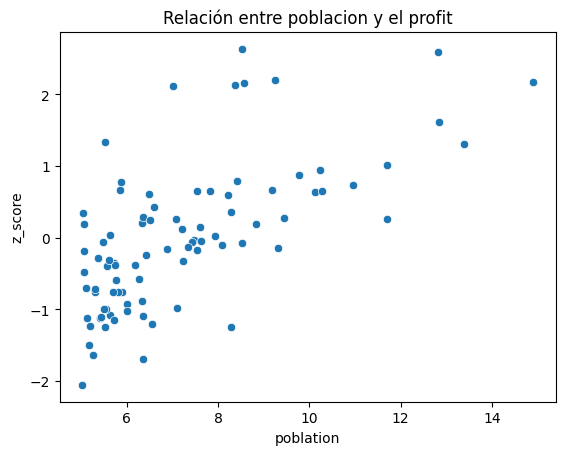

In [25]:
# Diagrama de dispersión
# Crear un scatterplot entre 'poblation' y 'profit'
sns.scatterplot(x='poblation', y='z_score', data=df_cleaned)
plt.title(f"Relación entre poblacion y el profit")
# Mostrar el gráfico
plt.show()

In [26]:
# Cálculo de correlación
correlacion_df = df_cleaned.corr(method = 'pearson')
print(f"Correlacion de Pearson\n{correlacion_df}")

Correlacion de Pearson
              poblation    profit     predichos      residuos   z_score
poblation  1.000000e+00  0.658356  1.000000e+00 -1.744259e-16  0.658356
profit     6.583557e-01  1.000000  6.583557e-01  7.527070e-01  1.000000
predichos  1.000000e+00  0.658356  1.000000e+00 -7.291285e-17  0.658356
residuos  -1.744259e-16  0.752707 -7.291285e-17  1.000000e+00  0.752707
z_score    6.583557e-01  1.000000  6.583557e-01  7.527070e-01  1.000000


In [27]:
# Construcción del modelo  y Coeficientes del modelo
modelo_regresion = LinearRegression()

# Reshape the 'poblation' column to a 2D array
x_clean = df_cleaned['poblation'].values.reshape(-1, 1)
y_clean = df_cleaned['z_score']

#Entrenar el modelo
modelo_regresion.fit(x_clean, y_clean)
print("Modelo entrenado exitosamente!")

pendiente = modelo_regresion.coef_[0]
intercepto = modelo_regresion.intercept_

print(f"\nCoeficiente (Pendiente, β₁): {pendiente:.4f}")
print(f"Intercepto (Ordenada al origen, β₀): {intercepto:.4f}")

print(f"\nEcuación de Regresión: Y = {intercepto:.4f} + {pendiente:.4f} * X")


Modelo entrenado exitosamente!

Coeficiente (Pendiente, β₁): 0.3094
Intercepto (Ordenada al origen, β₀): -2.2360

Ecuación de Regresión: Y = -2.2360 + 0.3094 * X


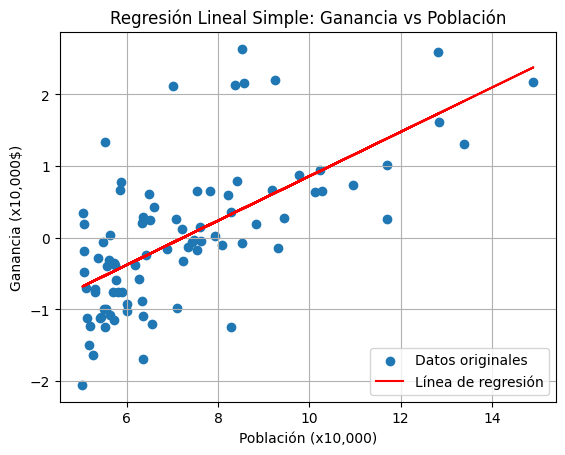

In [28]:
# Visualización del modelo ajustado

# Graficar los puntos originales
plt.scatter(x_clean, y_clean, label='Datos originales')

# Dibujar la línea de regresión ajustada
plt.plot(x_clean, modelo_regresion.predict(x_clean), color='red', label='Línea de regresión')

# Añadir etiquetas y título
plt.xlabel('Población (x10,000)')
plt.ylabel('Ganancia (x10,000$)')
plt.title('Regresión Lineal Simple: Ganancia vs Población')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
# Normalidad de los residuos
predichos = modelo_regresion.predict(x_clean)
df_cleaned['predichos'] = predichos
df_cleaned['residuos'] = y_clean - predichos
df_cleaned

/tmp/ipython-input-1034163196.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['predichos'] = predichos
/tmp/ipython-input-1034163196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['residuos'] = y_clean - predichos


,poblation,profit,predichos,residuos,z_score
1,5.5277,9.13020,-0.525964,1.860509,1.334545
2,8.5186,13.66200,0.399294,2.235309,2.634603
3,7.0032,11.85400,-0.069507,2.185440,2.115934
4,5.8598,6.82330,-0.423226,1.095980,0.672754
5,8.3829,11.88600,0.357314,1.767800,2.125114
...,...,...,...,...,...
92,5.8707,7.20290,-0.419854,1.201506,0.781652
93,5.3054,1.98690,-0.594734,-0.119951,-0.714685
94,8.2934,0.14454,0.329626,-1.572838,-1.243212
95,13.3940,9.05510,1.907536,-0.594535,1.313001


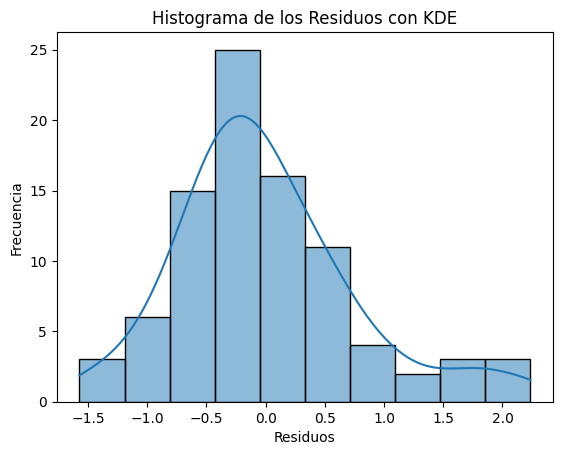

In [30]:
# Grafica un histograma con KDE de los residuos
sns.histplot(df_cleaned['residuos'], kde=True)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de los Residuos con KDE')
plt.show()

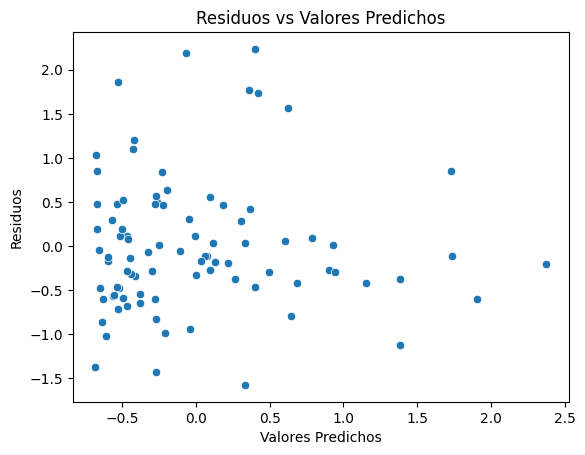

In [31]:
# Gráfico de residuos vs predichos
sns.scatterplot(x=df_cleaned['predichos'], y=df_cleaned['residuos'])
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores Predichos')
plt.show()

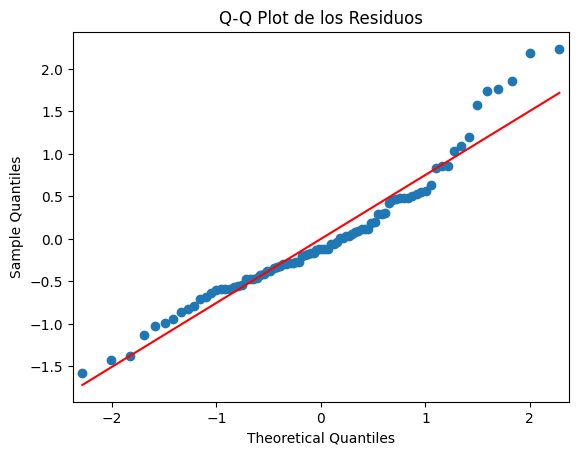

In [32]:
# Q-Q Plot
import statsmodels.api as sm

sm.qqplot(df_cleaned['residuos'], line='s')
plt.title('Q-Q Plot de los Residuos')
plt.show()

In [33]:
# Evaluación del modelo
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calcular las predicciones
predichos = modelo_regresion.predict(x_clean)

# Calcular MSE
mse = mean_squared_error(y_clean, predichos)

# Calcular RMSE
rmse = np.sqrt(mse)

# Calcular R²
r_cuadrado = r2_score(y_clean, predichos)


print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
print(f"Coeficiente de Determinación (R²): {r_cuadrado:.4f}")

Error Cuadrático Medio (MSE): 0.5666
Raíz del Error Cuadrático Medio (RMSE): 0.7527
Coeficiente de Determinación (R²): 0.4334


##Conclusiones
Despues de quitar outlayers y normalizar los datos usando z-scaler podemos decir que el modelo parece mejorar en terminos de reducir los errores de prediccion ya que indica un menor MSE = 0.5666 y RMSE = 0.7557 sin embargo, el valor R² en el valor normalizado nos dice que tal vez otros valores no incluidos en nuestro dataset o modelo contribuyen en la ganancia